# Rasterio Practice

In [1]:
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raster_path = (
    "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
)
src = rasterio.open(raster_path)
print(src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif' mode='r'>


In [3]:
src.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 4269,
 'height': 3113,
 'count': 1,
 'crs': CRS.from_epsg(3857),
 'transform': Affine(90.0, 0.0, -13442488.3428,
        0.0, -89.99579177642138, 4668371.5775)}

## Plotting Raster Data
Rasterio can easily integrate with `matplotlib` for raster visualization. The `rasterio.plot.show()` function is the simplest way to display a rasterimage, and by default, it shows the first band of the raster.

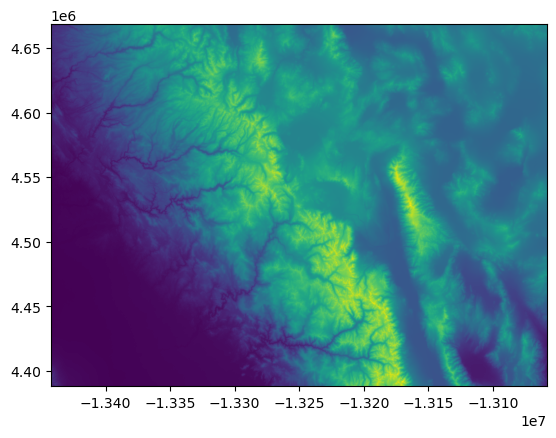

<Axes: >

In [4]:
rasterio.plot.show(src)

In [5]:
bands = src.indexes
print("Available bands:", bands)

Available bands: (1,)


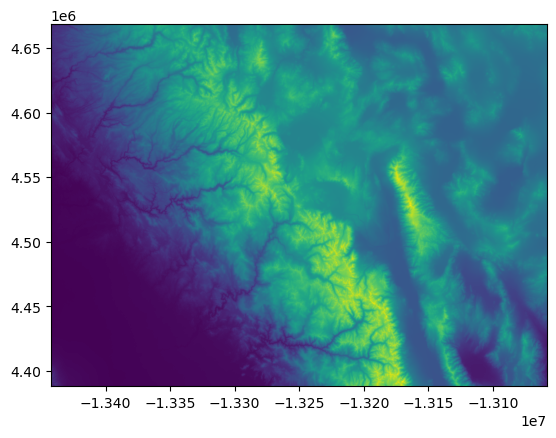

<Axes: >

In [6]:
rasterio.plot.show((src,1))

## Customizing Plots

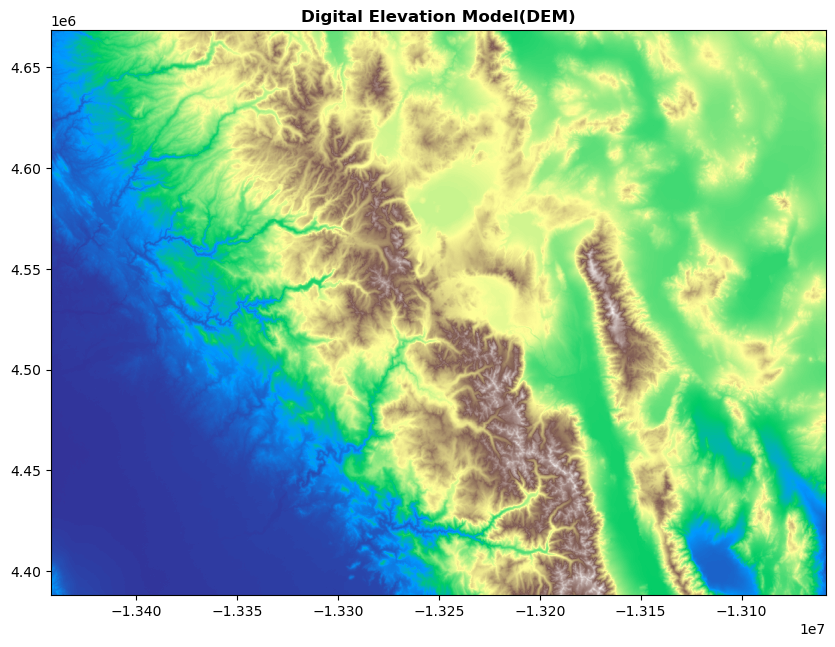

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
rasterio.plot.show(src, cmap="terrain", ax=ax, title="Digital Elevation Model(DEM)")
plt.show()

In [8]:
src.crs

CRS.from_epsg(3857)

## Plotting a Vector on Top of a Raster Image

In [9]:
dem_bounds = (
	"https://github.com/opengeos/datasets/releases/download/places/dem_bounds.geojson"
)
gdf = gpd.read_file(dem_bounds)
gdf = gdf.to_crs(src.crs)

<Axes: title={'center': 'Digital Elevation Model(DEM)'}>

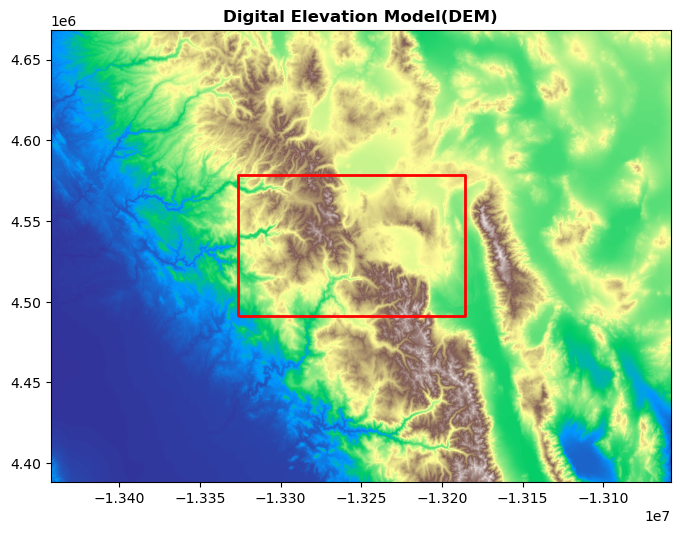

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
rasterio.plot.show(src, ax=ax, cmap="terrain", title="Digital Elevation Model(DEM)")
gdf.boundary.plot(ax=ax, color="red", linewidth=2)

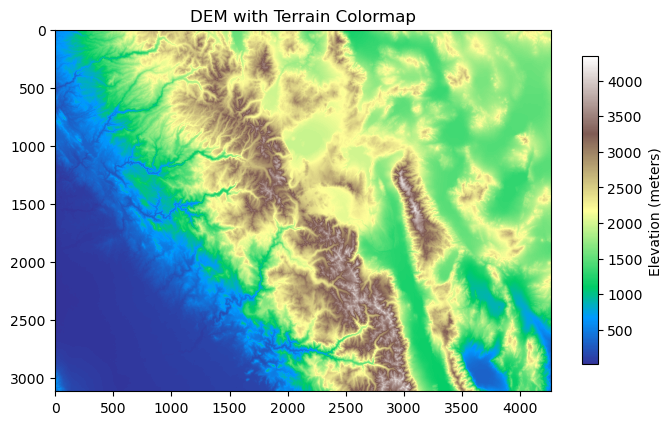

In [11]:
elev_band = src.read(1)
plt.figure(figsize=(8, 8))
plt.imshow(elev_band, cmap="terrain")
plt.colorbar(label="Elevation (meters)", shrink=0.5)
plt.title("DEM with Terrain Colormap")
plt.show()

## Accessing and Manipulating Raster Bands
Raster datasets often consist of multiple bands, each capturing a different part of the electromagnetic spectrum. For instance, satellite images may include separate bands for red, green, blue, and near-infrared (NIR) wavelengths.

In [12]:
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif"
src = rasterio.open(raster_path)
print(src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif' mode='r'>


In [13]:
src.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -inf,
 'width': 2485,
 'height': 2563,
 'count': 7,
 'crs': CRS.from_epsg(32611),
 'transform': Affine(90.0, 0.0, 582390.0,
        0.0, -90.0, 4105620.0)}

In [14]:
src.indexes

(1, 2, 3, 4, 5, 6, 7)

In [15]:
band_names = ["Coastal Aerosol", "Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"]

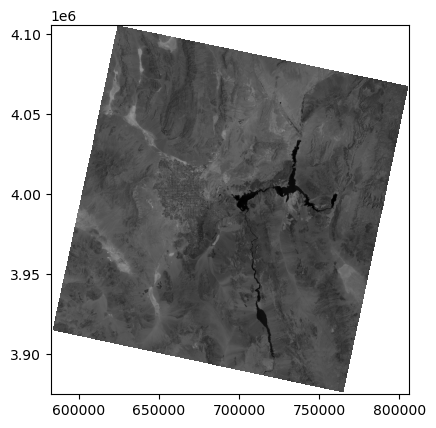

<Axes: >

In [16]:
rasterio.plot.show((src, 5), cmap="Greys_r")

In [17]:
src.count

7

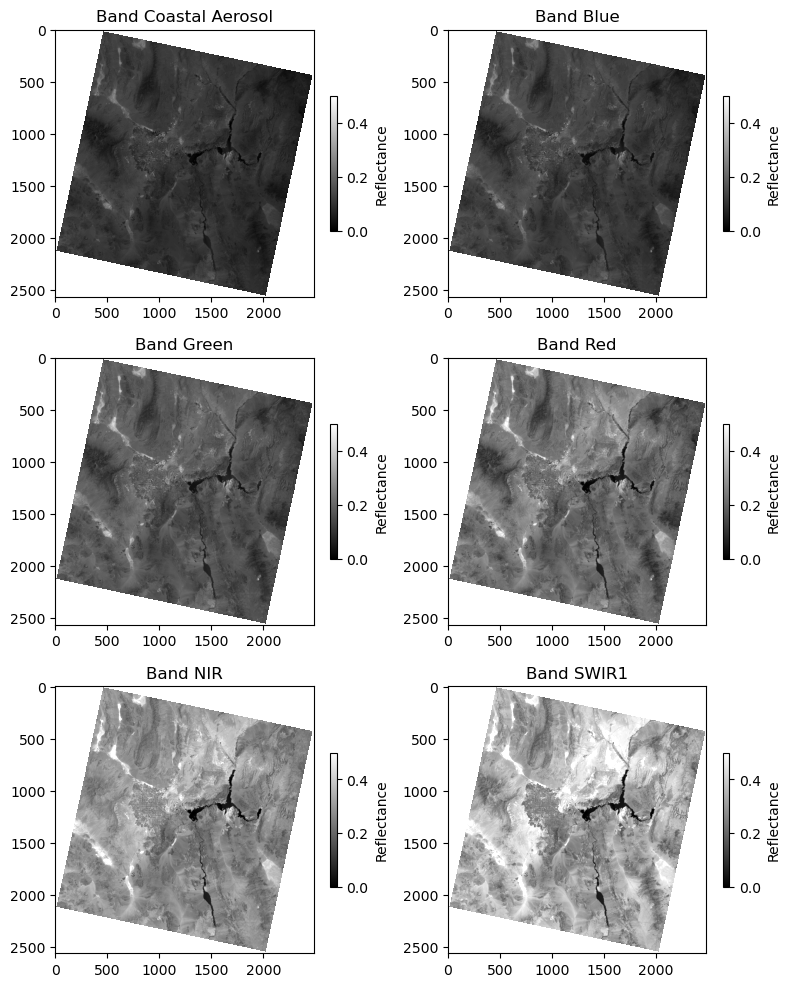

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
axes = ax.flatten()

for band in range(1, src.count):
  data = src.read(band)
  ax = axes[band - 1]
  im = ax.imshow(data, cmap="gray", vmin=0, vmax=0.5)
  ax.set_title(f"Band {band_names[band - 1]}")
  fig.colorbar(im, ax=ax, label="Reflectance", shrink=0.5)
plt.tight_layout()
plt.show()

## Stacking

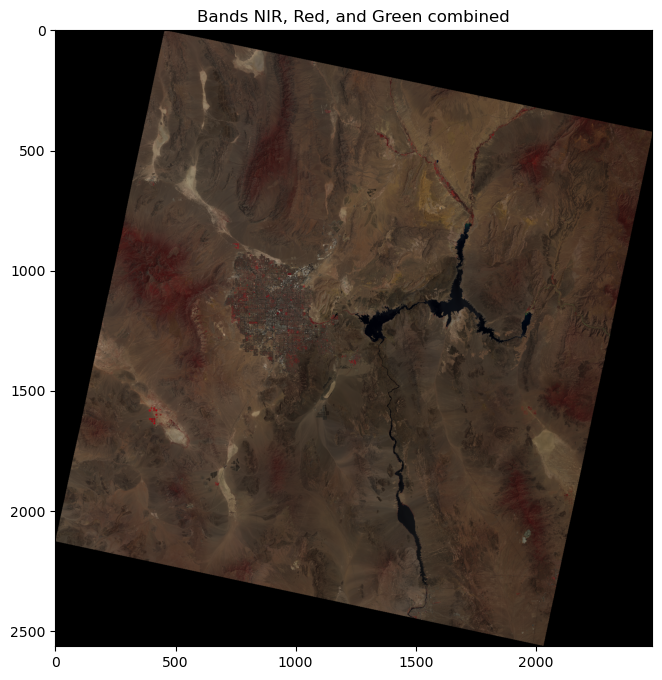

In [19]:
nir_band = src.read(5)
red_band = src.read(4)
green_band = src.read(3)

# Stack the bands into a single array
rgb = np.dstack((nir_band, red_band, green_band)).clip(0, 1)

# Plot the stacked array
plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.title("Bands NIR, Red, and Green combined")
plt.show()

### Basic Band math
Band math enables us to perform computations across different bands. A common application is calculating the Normalized Difference Vegetation Index (NDVI), which is an indicator of vegetation health.

NVDI is calculated as:

NVDI = (NIR - Red Band) / (NIR + Red Band)

C:\Users\ghost\AppData\Local\Temp\ipykernel_9772\1304945255.py:2: RuntimeWarning: invalid value encountered in subtract
  nvdi = (nir_band - red_band) / (nir_band + red_band)


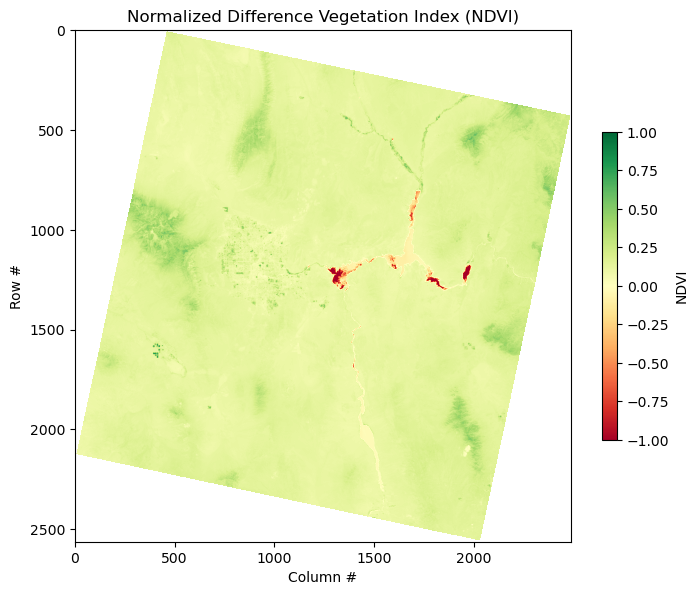

In [20]:
# NVDI
nvdi = (nir_band - red_band) / (nir_band + red_band)
nvdi = nvdi.clip(-1, 1)

plt.figure(figsize=(8, 8))
plt.imshow(nvdi, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar(label="NDVI", shrink=0.5)
plt.title("Normalized Difference Vegetation Index (NDVI)")
plt.xlabel("Column #")
plt.ylabel("Row #")
plt.show()

In [22]:
src.read(5)

array([[-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       ...,
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf]], dtype=float32)